In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from  tensorflow.keras.preprocessing import image
from PIL import Image
from tensorflow import keras

from keras import utils

IndexError: list index out of range

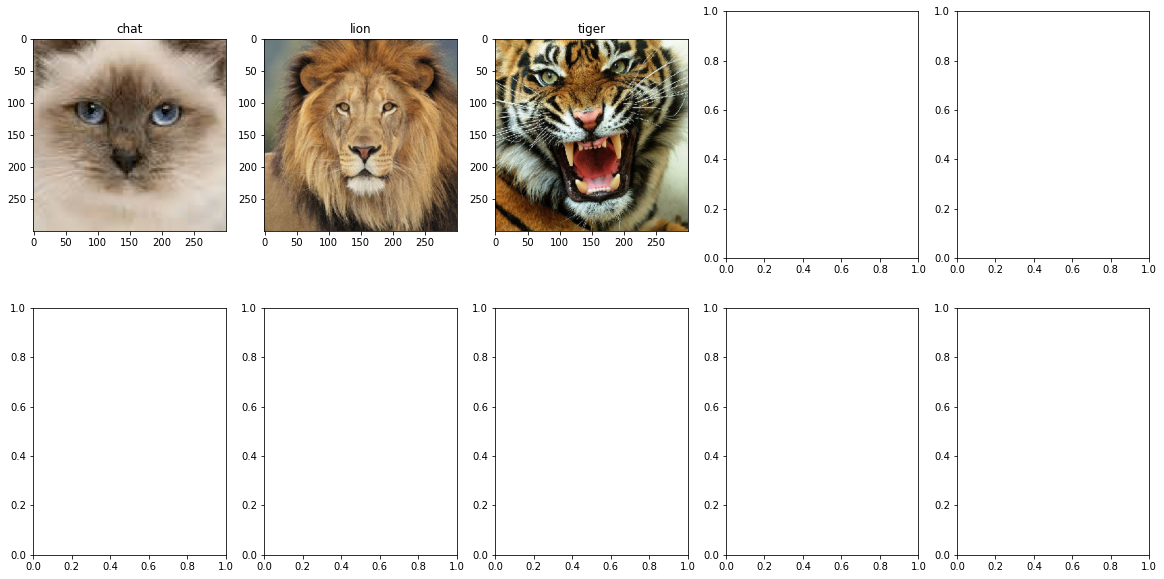

In [5]:
rows,cols = 2,5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))
categories=os.listdir("C:/Users/abdel/Desktop/Classification des animaux faciale/images")
for i in range(7):
    categorie=os.listdir("C:/Users/abdel/Desktop/Classification des animaux faciale/images/"+categories[i])
    img = image.load_img("C:/Users/abdel/Desktop/Classification des animaux faciale/images/"+categories[i]+"/"+categorie[0],target_size=(300,300))
    axes[i//cols, i%cols].set_title(categories[i])
    axes[i//cols, i%cols].imshow(img)

In [14]:

animals=[]
labels=[]
i=0;
path=os.listdir("C:/Users/abdel/Desktop/Classification des animaux faciale/images")
for directory in path:
    animals_directory=os.listdir("C:/Users/abdel/Desktop/Classification des animaux faciale/images/"+directory)
    for animal_name in animals_directory:
        img = image.load_img("C:/Users/abdel/Desktop/Classification des animaux faciale/images/"+directory+"/"+animal_name,target_size=(50,50))
        img = image.img_to_array(img)
        animals.append(np.array(img))
        labels.append(i)
    i=i+1

In [15]:
animals=np.array(animals)
labels=np.array(labels)
labels=labels.reshape(labels.shape[0],1)
s=np.arange(animals.shape[0])

np.random.shuffle(s)
animals=animals[s]
labels=labels[s]

In [16]:
num_classes=len(np.unique(labels))
data_length=animals.shape[0]


In [17]:
(x_train,x_test)=animals[(int)(0.1*data_length):],animals[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)


In [18]:
(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]


In [19]:
import keras
from keras.utils import np_utils
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)


AttributeError: module 'keras.utils' has no attribute 'to_categorical'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(7,activation="softmax"))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,batch_size=50
          ,epochs=10,verbose=1)

Epoch 1/10
215/215 [==============================] - 16s 73ms/step - loss: 0.1256 - accuracy: 0.9554
Epoch 2/10
215/215 [==============================] - 17s 77ms/step - loss: 0.1120 - accuracy: 0.9595
Epoch 3/10
215/215 [==============================] - 17s 77ms/step - loss: 0.0978 - accuracy: 0.9666
Epoch 4/10
215/215 [==============================] - 17s 77ms/step - loss: 0.0826 - accuracy: 0.9736
Epoch 5/10
215/215 [==============================] - 17s 77ms/step - loss: 0.0818 - accuracy: 0.9726
Epoch 6/10
215/215 [==============================] - 17s 78ms/step - loss: 0.0873 - accuracy: 0.9691
Epoch 7/10
215/215 [==============================] - 17s 78ms/step - loss: 0.0815 - accuracy: 0.9723
Epoch 8/10
215/215 [==============================] - 17s 77ms/step - loss: 0.0747 - accuracy: 0.9746
Epoch 9/10
215/215 [==============================] - 17s 78ms/step - loss: 0.0759 - accuracy: 0.9727
Epoch 10/10
215/215 [==============================] - 18s 85ms/step - loss: 0.066

In [18]:
score = model.evaluate(x_test, y_test, verbose=1)


38/38 [==============================] - 1s 16ms/step - loss: 1.2211 - accuracy: 0.7406


In [30]:
def get_animal_name(label):
    if label==0:
        return "chat"
    if label==1:
        return "cheval"
    if label==2:
        return "chien"
    if label==3:
        return "lion"
    if label==4:
        return "éléphant"
    if label==5:
        return "tiger"
    if label==6:
        return "vache"

def predict_animal(path):
    print("Prediction ...")
    img = image.load_img(path, target_size=(50,50))
    img = image.img_to_array(img)
    img=img/255
    a=[]
    a.append(img)
    a=np.array(a)
    prediction=model.predict(a,verbose=1)
    print(prediction)
    label_index=np.argmax(prediction)
    print(label_index)
    animal=get_animal_name(label_index)
    img=image.load_img(path)
    plt.imshow(img)
    print("l'animal = "+str(animal)+" || accuracy =",np.max(prediction))

Prediction ...
1/1 [==============================] - 0s 0s/step
[[2.0367617e-08 2.5971541e-03 5.2856012e-07 1.2866501e-10 5.7645486e-11
  9.9740231e-01 2.1450296e-08]]
5
l'animal = tiger || accuracy = 0.9974023


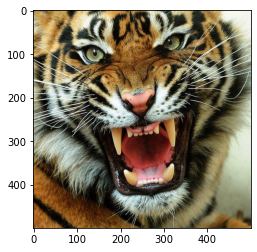

In [31]:
predict_animal("C:/Users/lenovo/Documents/classification/images/tiger/0_.jpg")


In [166]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk
mo

Saved model to disk
